# 导入程序需要运行库

In [76]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
import statsmodels as sm
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm
from sklearn.metrics import mean_squared_error # 均方误差
from sklearn.metrics import mean_absolute_error # 平方绝对误差
from sklearn.metrics import r2_score # R square
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
plt.rcParams['figure.figsize']=(20, 10)

# 原始数据预览

In [20]:
data = pd.read_excel(r'data1.xlsx')
data.iloc[:,1].describe()

count      230.000000
mean      7313.410870
std       2429.075456
min       2187.000000
25%       5490.750000
50%       7603.000000
75%       9153.750000
max      14939.000000
Name: 包装专用设备产量_当期值(台), dtype: float64

In [23]:
data

,时间,包装专用设备产量_当期值(台)
0,1998年2月,3389.0
1,1998年3月,5940.0
2,1998年4月,3680.0
3,1998年5月,4261.0
4,1998年6月,2627.0
...,...,...
225,2018年8月,8580.0
226,2018年9月,9162.0
227,2018年10月,8924.0
228,2018年11月,10427.0


Text(0.5, 1.0, '中国包装专用设备产数据')

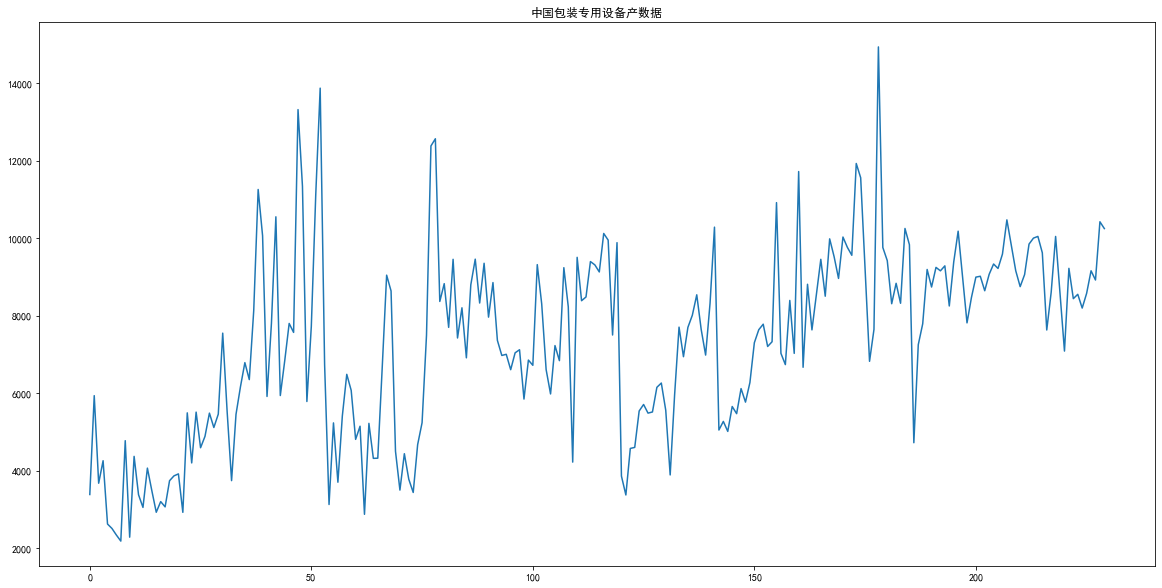

In [28]:
plt.plot(data.iloc[:,1])
plt.title("中国包装专用设备产数据")

# 对原始数据进行一阶差分与二阶差分

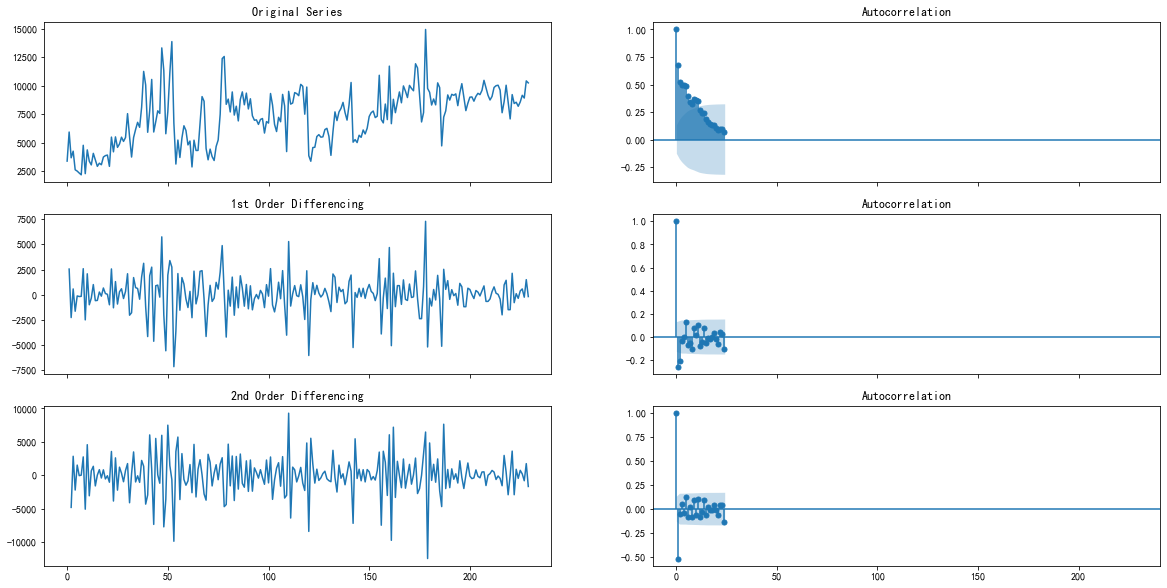

In [29]:
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(data.iloc[:,1]); axes[0, 0].set_title('Original Series')
plot_acf(data.iloc[:,1], ax=axes[0, 1])
# 1st Differencing
axes[1, 0].plot(data.iloc[:,1].diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(data.iloc[:,1].diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(data.iloc[:,1].diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(data.iloc[:,1].diff().diff().dropna(), ax=axes[2, 1])
plt.show()

# 单位根检验与白噪声检验

In [49]:
y = data.iloc[:,1]
#单位根检验
sm.tsa.stattools.adfuller(y.diff(1)[1:])
#一阶差分之后原始数据是平稳数据

(-11.876085687762412,
 6.336238787185674e-22,
 3,
 225,
 {'1%': -3.4597521044060353,
  '5%': -2.874472927517147,
  '10%': -2.5736628197530864},
 3791.238096436704)

In [43]:
from statsmodels.stats.diagnostic import acorr_ljungbox
#白噪声检验
acorr_ljungbox(y, lags = [6, 12],boxpierce=True)
#不能拒绝原假设，这个时间序列的确就是白噪声序列。

D:\Anaconda\lib\site-packages\statsmodels\stats\diagnostic.py:559: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


(array([381.29292493, 546.07543412]),
 array([2.93276186e-079, 3.39746383e-109]),
 array([373.07760056, 529.7765127 ]),
 array([1.70762693e-077, 1.01127291e-105]))

# 构建ARIMA(1,1,3)模型实例

In [51]:
from statsmodels.tsa.arima_model import ARIMA

# 1,1,2 ARIMA Model
model = ARIMA(data.iloc[:,1], order=(1,1,3))
model_fit = model.fit(disp=0)
print(model_fit.summary())

D:\Anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                             ARIMA Model Results                              
Dep. Variable:      D.包装专用设备产量_当期值(台)   No. Observations:                  229
Model:                 ARIMA(1, 1, 3)   Log Likelihood               -2024.821
Method:                       css-mle   S.D. of innovations           1663.518
Date:                Thu, 07 Jul 2022   AIC                           4061.642
Time:                        11:11:51   BIC                           4082.244
Sample:                             1   HQIC                          4069.954
                                                                              
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      25.6254     29.949      0.856      0.392     -33.074      84.325
ar.L1.D.包装专用设备产量_当期值(台)    -0.9295      0.030    -30.940      0.000      -0.988      -0.871


D:\Anaconda\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
D:\Anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureW

D:\Anaconda\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
D:\Anaconda\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


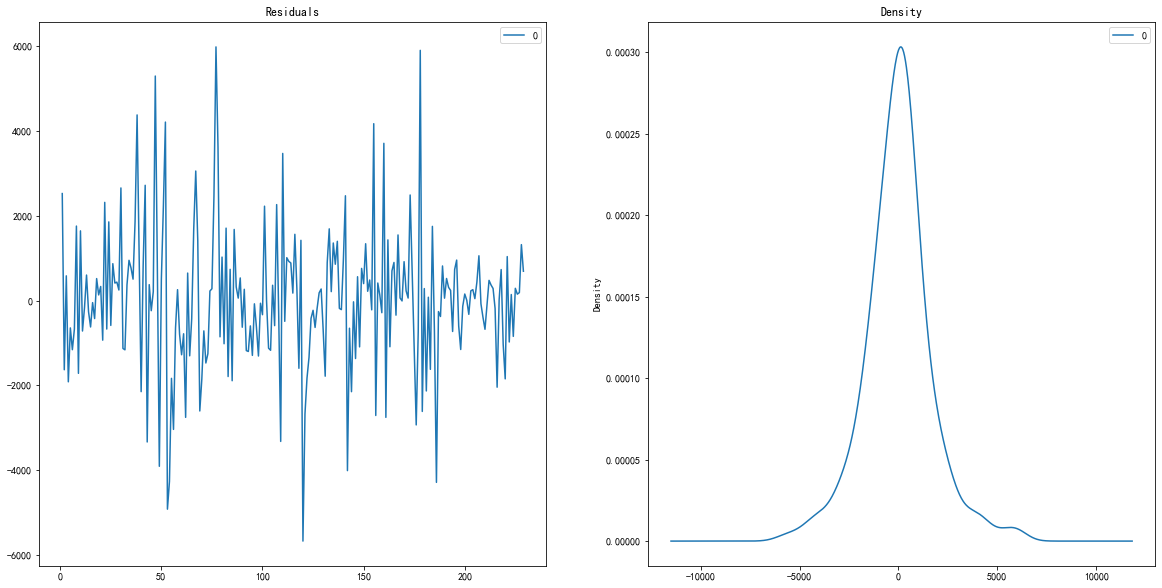

In [52]:
#查看残差是否符合正态分布
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

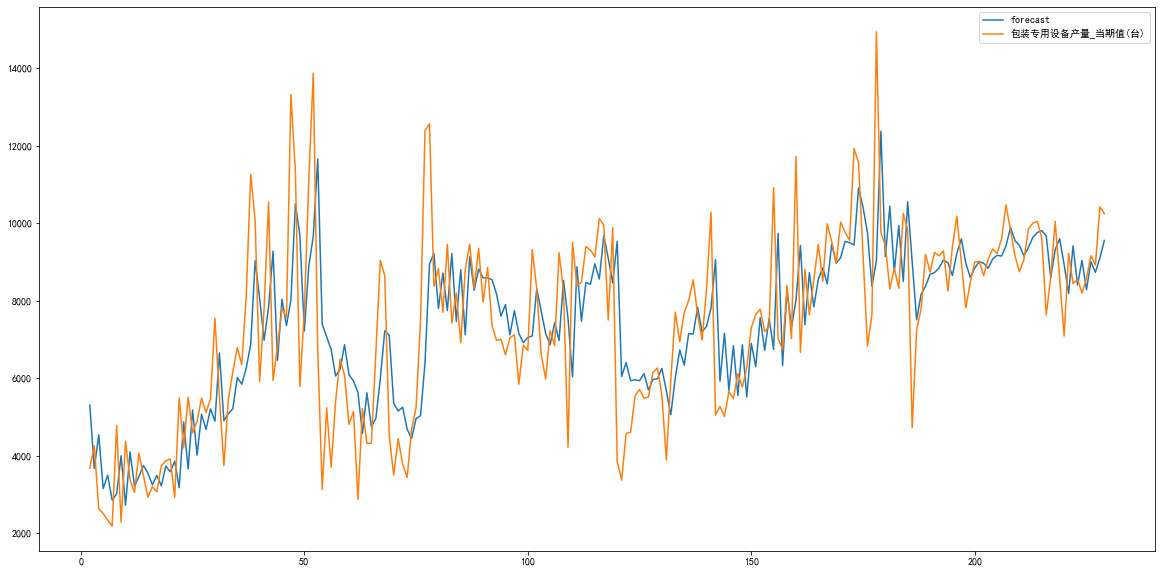

In [54]:
model_fit.plot_predict(dynamic=False)
plt.show()

D:\Anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
D:\Anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated i

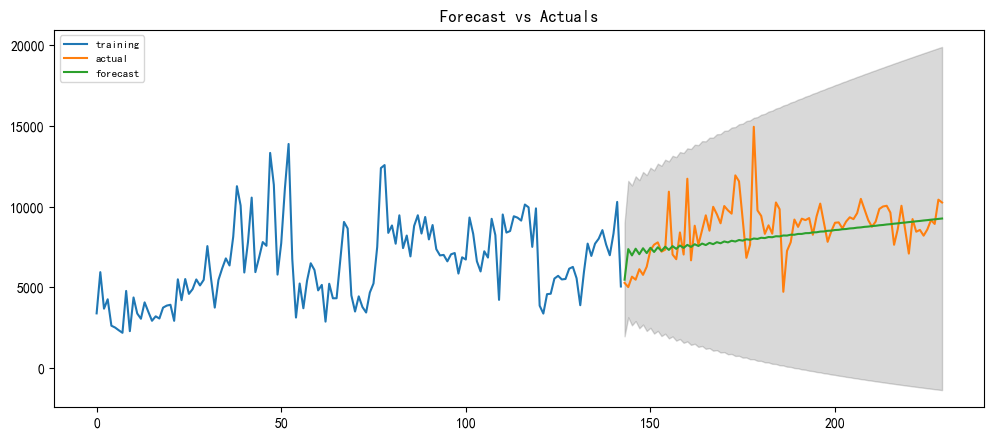

In [55]:
#模型预测结果
from statsmodels.tsa.stattools import acf

# Create Training and Test
train = data.iloc[:143,1]
test = data.iloc[143:,1]

# Build Model
# model = ARIMA(train, order=(3,2,1))  
model = ARIMA(train, order=(1, 1, 3))  
fitted = model.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(87, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

# 采用超参数优化的方法选择最优ARIMA模型

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=4098.870, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=4771.515, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=4132.500, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=4528.081, Time=0.11 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=4085.971, Time=0.19 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=4120.400, Time=0.03 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=4087.453, Time=0.17 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=4086.497, Time=0.30 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=4084.568, Time=0.13 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=4415.230, Time=0.22 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=4087.819, Time=0.07 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=4331.860, Time=0.37 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=4086.409, Time=0.43 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=4090.721, Time=0.07 sec

Best model:  ARIMA(1,0,2)(0,0,0)

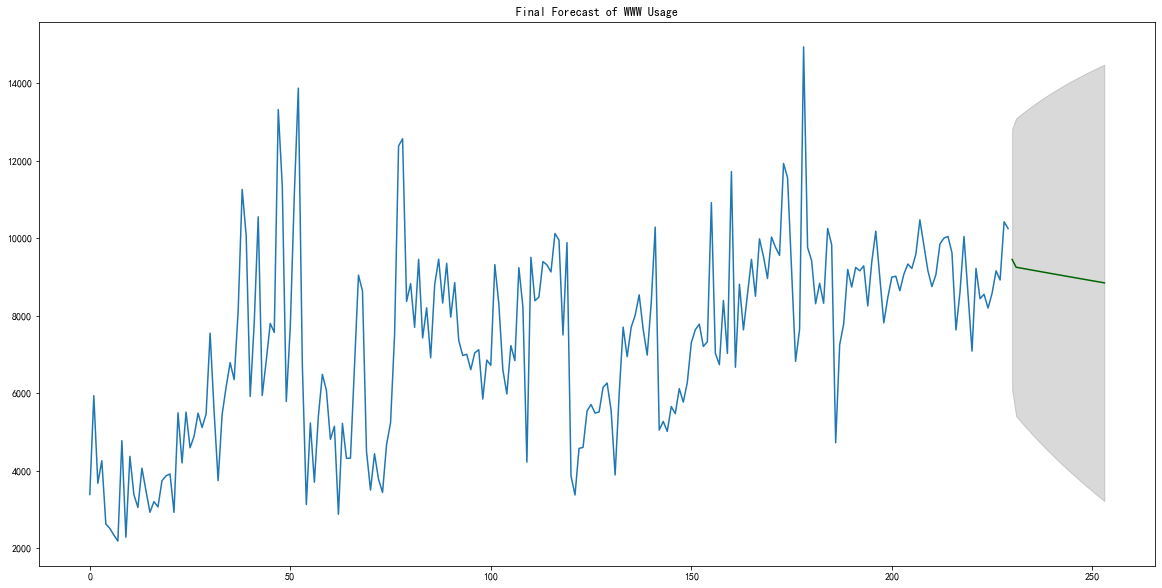

In [57]:
#为引进季节因子的超参数优化过程
model = pm.auto_arima(data.iloc[:,1], start_p=1, start_q=1,
                      information_criterion='aic',
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=4, max_q=4, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

# Forecast
n_periods = 24
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(data.iloc[:,1]), len(data.iloc[:,1])+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(data.iloc[:,1])
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Final Forecast of WWW Usage")
plt.show()

In [58]:
#引进季节因子的超参数优化过程
import pmdarima as pm
# Seasonal - fit stepwise auto-ARIMA
smodel = pm.auto_arima(data.iloc[:,1], start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)
smodel.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=1.80 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=4085.296, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=3977.548, Time=0.59 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=1.36 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=4085.787, Time=0.02 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=4028.507, Time=0.04 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=3950.689, Time=1.74 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=4.70 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=1.65 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=4028.299, Time=2.30 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=3952.147, Time=2.17 sec
 ARIMA(1,0,1)(2,1,0)[12] intercept   : AIC=3950.508, Time=2.53 sec
 ARIMA(1,0,1)(1,1,0)[12] intercept   : AIC=3977.241, Time=0.97 sec
 ARIMA(1,0,1)(2,1,1)[12] intercept   : AIC=3926.758, Time=4.01 sec
 ARIMA(1,0,1)(1,1,1)[12] intercept   : 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  230
Model:             SARIMAX(1, 0, 1)x(2, 1, 1, 12)   Log Likelihood               -1956.379
Date:                            Thu, 07 Jul 2022   AIC                           3926.758
Time:                                    11:18:17   BIC                           3950.450
Sample:                                         0   HQIC                          3936.327
                                            - 230                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     19.1459     27.526      0.696      0.487     -34.804      73.095
ar.L1          0.9209      0.053     17.474      0.000       0.818       1.024
ma.L1         -0.5066      0.107     -4.740      0.000      -0.716      -0.297
ar.S.L12      -0.0727      0.141     -0.515      0.607      -0.350       0.204
ar.S.L24      -0.0531      0.119     -0.446      0.656      -0.287       0.180
ma.S.L12      -0.8805      0.149     -5.915      0.000      -1.172      -0.589
sigma2      4.597e+06   5.57e+05      8.257      0.000    3.51e+06    5.69e+06
===================================================================================
Ljung-Box (L1) (Q):                   2.47   Jarque-Bera (JB):                94.58
Prob(Q):                              0.12   Prob(JB):                         0.00
Heteroskedasticity (H):               0.46   Skew:                             0.39
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

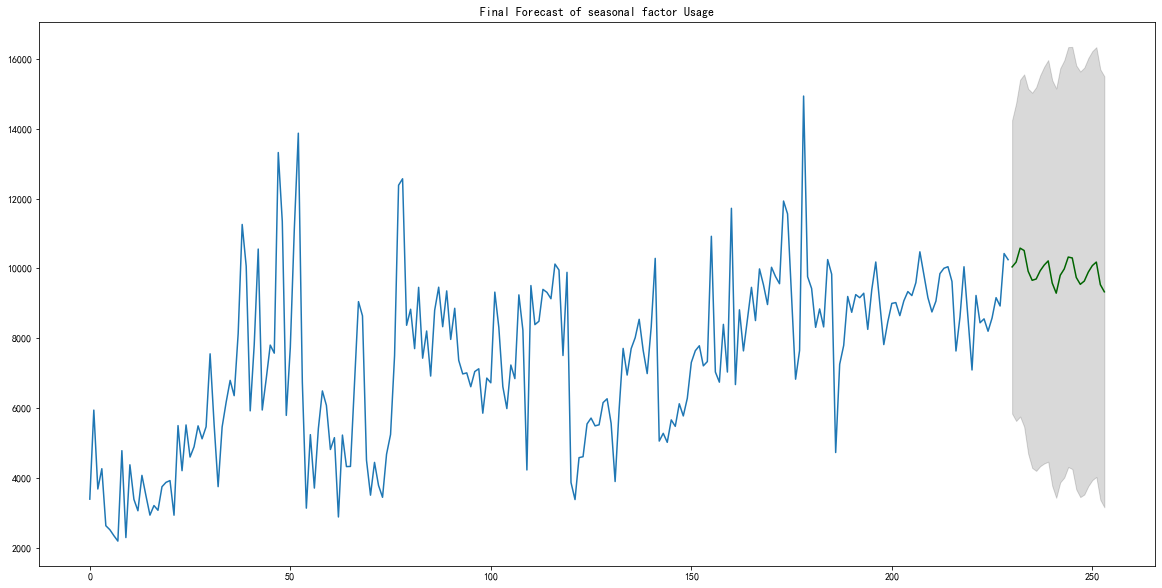

D:\Anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


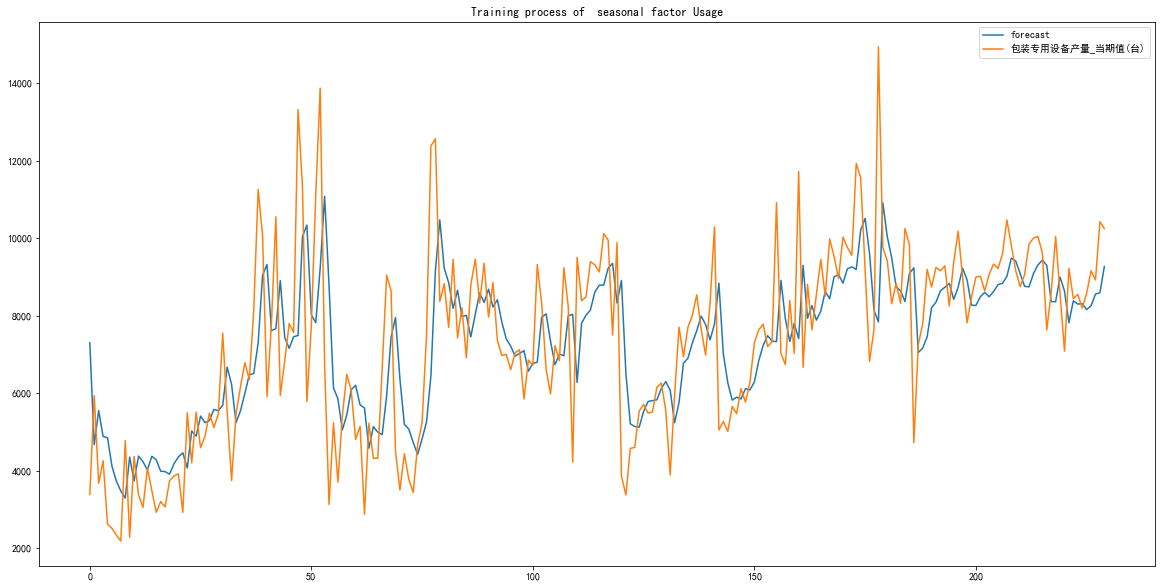

In [59]:
model = smodel
n_periods = 24
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(data.iloc[:,1]), len(data.iloc[:,1])+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(data.iloc[:,1])
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)
plt.title("Final Forecast of seasonal factor Usage")
plt.show()
model = ARIMA(data.iloc[:,1],order=(1, 0, 1))
model_fit = model.fit(disp=0)
model_fit.plot_predict(dynamic=False)
plt.title("Training process of  seasonal factor Usage")
plt.show()

In [63]:
#显示smodel的相关参数
smodel.params()

array([ 1.91458613e+01,  9.20890667e-01, -5.06623130e-01, -7.27113226e-02,
       -5.31233300e-02, -8.80532392e-01,  4.59726501e+06])

In [78]:
#计算预测结果的MSE（均方误差）
fc, confint = smodel.predict(n_periods=24, return_conf_int=True)
y_test =y[206:]
y_predict  = fc
mean_squared_error(y_test,y_predict)

1386143.126665431